<a href="https://colab.research.google.com/github/Daisyta/Optimizacion_portafolios_inversion/blob/main/Optimizacion_portafolio_3activos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install git+https://github.com/quantopian/pyfolio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/quantopian/pyfolio to /tmp/pip-req-build-orhhb690
  Running command git clone -q https://github.com/quantopian/pyfolio /tmp/pip-req-build-orhhb690


In [ ]:
pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install datetime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install folium==0.2.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!wget https://launchpad.net/~mario-mariomedina/+archive/ubuntu/talib/+files/libta-lib0_0.4.0-oneiric1_amd64.deb -qO libta.deb
!wget https://launchpad.net/~mario-mariomedina/+archive/ubuntu/talib/+files/ta-lib0-dev_0.4.0-oneiric1_amd64.deb -qO ta.deb
!dpkg -i libta.deb ta.deb
!pip install ta-lib

(Reading database ... 155679 files and directories currently installed.)
Preparing to unpack libta.deb ...
Unpacking libta-lib0 (0.4.0-oneiric1) over (0.4.0-oneiric1) ...
Preparing to unpack ta.deb ...
Unpacking ta-lib0-dev (0.4.0-oneiric1) over (0.4.0-oneiric1) ...
Setting up libta-lib0 (0.4.0-oneiric1) ...
Setting up ta-lib0-dev (0.4.0-oneiric1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Processing triggers for libc-bin (2.27-3ubuntu1.3) ...
/sbin/ldconfig.real: /usr/local/lib/python3.7/dist-packages/ideep4py/lib/libmkldnn.so.0 is not a symbolic link

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install yfinance==0.1.69

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install TA-Lib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import pandas_datareader.data as pdr
import datetime as data 
import matplotlib.pyplot as plt
import pyfolio
import talib
import requests
import yfinance as yf
yf.pdr_override()

In [ ]:
def get_data(index):
  data = yf.download(index,start=startdate,end=enddate)
  return data

In [ ]:
startdate = data.datetime(2017,1,1)
enddate = data.datetime(2018,1,1)

In [ ]:
from pandas.core.indexes.multi import sparsify_labels

spy = get_data("SPY")
tsla = get_data("TSLA")
amzn = get_data("AMZN")


amzn.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,37.896000,37.938000,37.384998,37.683498,37.683498,70422000
2017-01-04,37.919498,37.984001,37.709999,37.859001,37.859001,50210000
2017-01-05,38.077499,39.119999,38.013000,39.022499,39.022499,116602000
2017-01-06,39.118000,39.972000,38.924000,39.799500,39.799500,119724000
2017-01-09,39.900002,40.088501,39.588501,39.846001,39.846001,68922000


In [ ]:
for stock in (amzn,tsla,spy):
    stock["Returns"] = stock["Adj Close"] / stock["Adj Close"].iloc[0]

In [ ]:
amzn.head()

,Open,High,Low,Close,Adj Close,Volume,Returns
Date,,,,,,,
2017-01-03,37.896000,37.938000,37.384998,37.683498,37.683498,70422000,1.000000
2017-01-04,37.919498,37.984001,37.709999,37.859001,37.859001,50210000,1.004657
2017-01-05,38.077499,39.119999,38.013000,39.022499,39.022499,116602000,1.035533
2017-01-06,39.118000,39.972000,38.924000,39.799500,39.799500,119724000,1.056152
2017-01-09,39.900002,40.088501,39.588501,39.846001,39.846001,68922000,1.057386


In [ ]:
for stock,allocation in zip((amzn,tsla,spy),[(.2),(.4),(.4)]):
    stock["Allocation"] = stock["Returns"] * allocation
amzn.head()

,Open,High,Low,Close,Adj Close,Volume,Returns,Allocation
Date,,,,,,,,
2017-01-03,37.896000,37.938000,37.384998,37.683498,37.683498,70422000,1.000000,0.200000
2017-01-04,37.919498,37.984001,37.709999,37.859001,37.859001,50210000,1.004657,0.200931
2017-01-05,38.077499,39.119999,38.013000,39.022499,39.022499,116602000,1.035533,0.207107
2017-01-06,39.118000,39.972000,38.924000,39.799500,39.799500,119724000,1.056152,0.211230
2017-01-09,39.900002,40.088501,39.588501,39.846001,39.846001,68922000,1.057386,0.211477


In [ ]:
#100 es la cantidad de usd de cada stock a invertir
for stock in (amzn,tsla,spy):
    stock["Position"] = stock["Allocation"] * 100
amzn.head()

,Open,High,Low,Close,Adj Close,Volume,Returns,Allocation,Position
Date,,,,,,,,,
2017-01-03,37.896000,37.938000,37.384998,37.683498,37.683498,70422000,1.000000,0.200000,20.000000
2017-01-04,37.919498,37.984001,37.709999,37.859001,37.859001,50210000,1.004657,0.200931,20.093146
2017-01-05,38.077499,39.119999,38.013000,39.022499,39.022499,116602000,1.035533,0.207107,20.710656
2017-01-06,39.118000,39.972000,38.924000,39.799500,39.799500,119724000,1.056152,0.211230,21.123039
2017-01-09,39.900002,40.088501,39.588501,39.846001,39.846001,68922000,1.057386,0.211477,21.147718


In [ ]:
portafolio = pd.concat([ amzn['Position'],tsla['Position'],spy['Position']], axis=1)
portafolio.columns = ['AMZN','TSLA','SPY']
portafolio.head()

,AMZN,TSLA,SPY
Date,,,
2017-01-03,20.000000,40.000000,40.000000
2017-01-04,20.093146,41.843403,40.237963
2017-01-05,20.710656,41.799161,40.206003
2017-01-06,21.123039,42.215770,40.349844
2017-01-09,21.147718,42.634224,40.216645


In [ ]:
portafolio_total=portafolio.sum(axis=1)
portafolio_total.head()

Date
2017-01-03    100.000000
2017-01-04    102.174512
2017-01-05    102.715820
2017-01-06    103.688652
2017-01-09    103.998588
dtype: float64

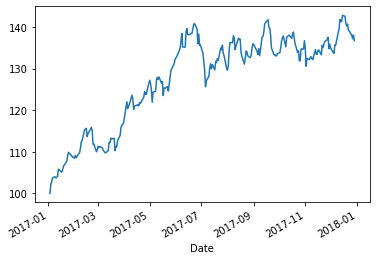

In [ ]:
portafolio_total.plot()
plt.show()

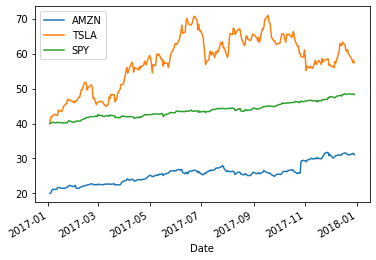

In [ ]:
portafolio.plot()
plt.show()

In [ ]:
#retornos diarios del portafolio
portafolio_returns = portafolio_total.pct_change().dropna()
portafolio_returns.head()

Date
2017-01-04    0.021745
2017-01-05    0.005298
2017-01-06    0.009471
2017-01-09    0.002989
2017-01-10   -0.002760
dtype: float64

Start date,2017-01-04
End date,2017-12-29
Total months,11
,Backtest
Annual return,37.084%
Cumulative returns,36.741%
Annual volatility,18.376%
Sharpe ratio,1.81
Calmar ratio,3.43
Stability,0.76
Max drawdown,-10.818%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,10.82,2017-06-23,2017-07-06,2017-09-15,61
1,7.90,2017-09-18,2017-11-02,2017-12-12,62
2,5.27,2017-02-21,2017-03-10,2017-03-29,27
3,4.28,2017-12-15,2017-12-29,NaT,NaN
4,4.18,2017-05-01,2017-05-04,2017-05-10,8


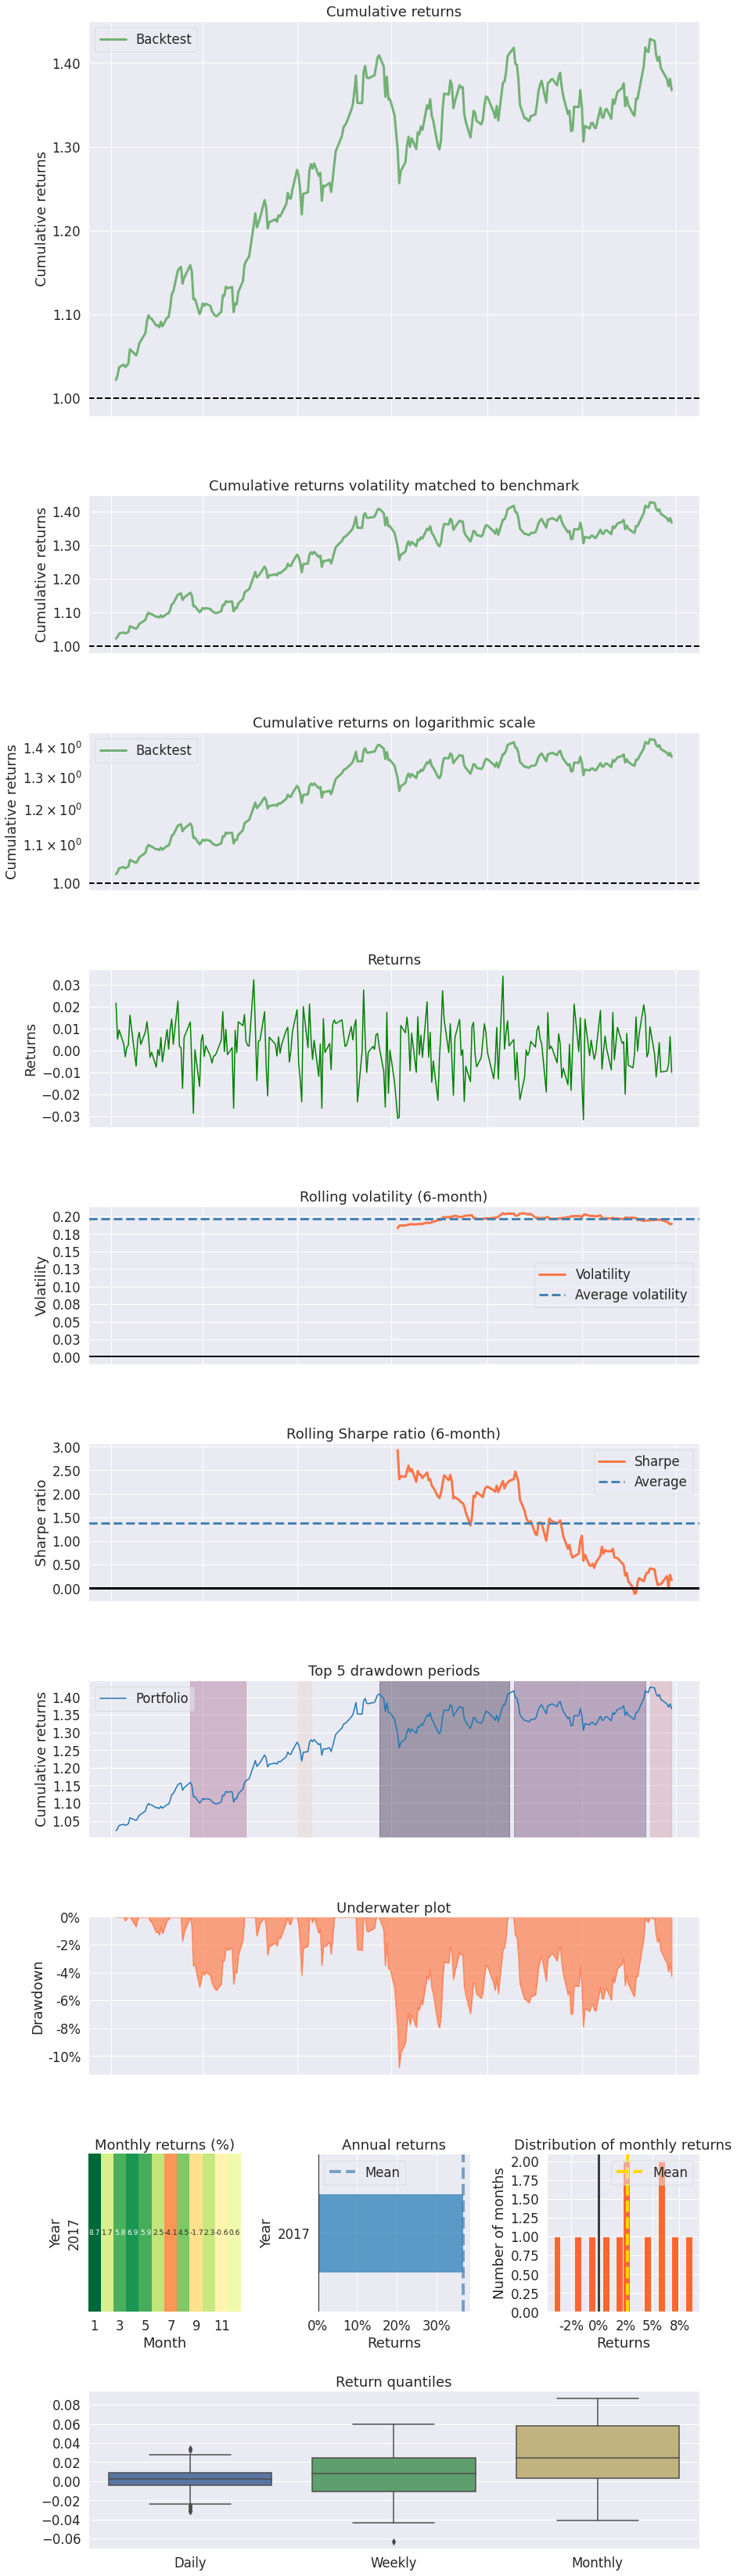

In [ ]:
benchmark = amzn[ 'Adj Close' ]
bench = benchmark.pct_change().dropna()
bench.rename('Benchmark AMZN')
%matplotlib inline
#silencia warnings
import warnings
warnings.filterwarnings('ignore')
pyfolio.create_returns_tear_sheet(portafolio_returns)

# Sección nueva

In [ ]:
#Retorno logaritmico de portafolio
import numpy as np
rets = np.log(portafolio/portafolio.shift(1)).dropna()
print(rets.head())

                AMZN      TSLA       SPY
Date                                    
2017-01-04  0.004646  0.045055  0.005931
2017-01-05  0.030270 -0.001058 -0.000795
2017-01-06  0.019716  0.009918  0.003571
2017-01-09  0.001168  0.009863 -0.003307
2017-01-10 -0.001281 -0.006115  0.000000


In [ ]:
#media anualizada,252 porque son 252 dias de trading en la bolsa
mean = rets.mean() * 252
print(mean)

AMZN    0.442866
TSLA    0.363955
SPY     0.190323
dtype: float64


In [ ]:
covariance= rets.cov() * 252
print (covariance)

          AMZN      TSLA       SPY
AMZN  0.042139  0.015466  0.005860
TSLA  0.015466  0.125393  0.006131
SPY   0.005860  0.006131  0.004520


In [ ]:
#pesos,de forma aleatoria, de un array con 9 espacios
weights = np.random.random(3)
print(weights)
#suma de los pesos=1
weights = weights/np.sum(weights)
print(weights.sum())

[0.92863737 0.52980532 0.60508707]
1.0


In [ ]:
#Retorno esperado para cada uno de los activos,el promedio ponderado de retorno para cada uno de los activos
#suma de nuestros retornos por los pesos correspondientes
exp_ret =np.sum(rets.mean() * weights) * 252
print(exp_ret)

0.34855291836449454


In [ ]:
exp_cov=np.dot(weights.T,np.dot(rets.cov()* 252 ,weights))
print(exp_cov)

0.023232200663473448


In [ ]:
#desviacion estandar,volatilidad,raiz cuadrada de a covarianza
exp_std=np.sqrt(np.dot(weights.T,np.dot(rets.cov()*252,weights)))
print(exp_std)

0.15242112932094895


In [ ]:
#SIMULACION MONTECARLO:uso de procesos aleatorios para pronosticar un modelo ,
#usaremos valores aleatorios en los pesos de los portafolios ,para ello hay que definir un array vacio donde se almacenen los retornos
#para las volatilidades tb(desviacion estandar),se hace un ciclo for con 3000 simulaciones
prets=[]
pvols=[]
for p in range(3000):
  weights = np.random.random(3)
  weights /= np.sum(weights)
  prets.append(np.sum(rets.mean()*weights)*252)
  pvols.append(np.sqrt(np.dot(weights.T,np.dot(rets.cov()*252,weights))))

prets=np.array(prets)
pvols=np.array(pvols)

print(prets[:5])
print(pvols[:5])

[0.34355168 0.29463032 0.39024088 0.33942041 0.36417379]
[0.13731547 0.14532759 0.2277404  0.13872898 0.18614557]


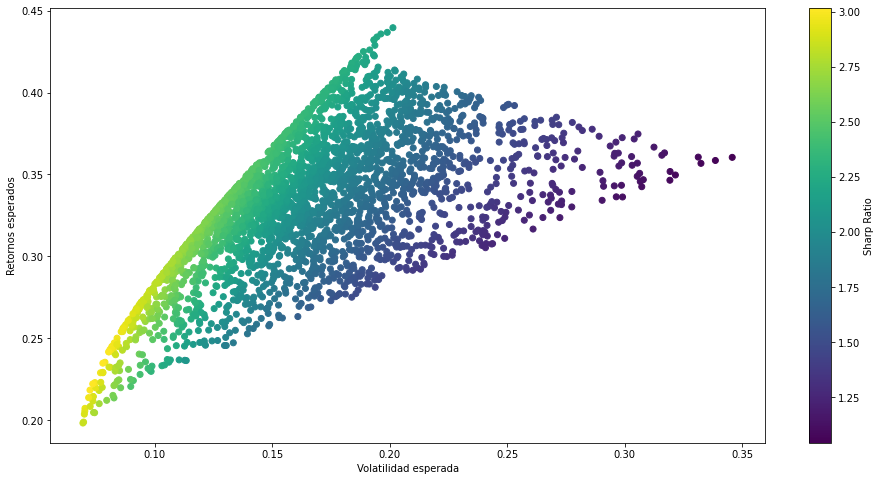

In [ ]:
#SHARP RATIO,que portafolio es mejor que otro,o,que portafolio con las mismas acciones pueden tener diferentes riesgos
plt.figure(figsize=(16,8))
plt.scatter(pvols,prets,c=prets / pvols,marker='o')
plt.grid=True
plt.xlabel('Volatilidad esperada')
plt.ylabel('Retornos esperados')
plt.colorbar(cmap='plasma',label='Sharp Ratio')
plt.show()
#¿como encontrar el peso ideal para optimizar portafolio,para obtener el mejor sharp ratio

In [ ]:
pip install scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#OPTIMIZACION DE PORTAFOLIO,estadisticas daado los pesos,definir una fx estadistica dada por los pesos
def pstats(weights):
    weights= np.array(weights)
    pret= np.sum(rets.mean()*weights)*252
    pvol=np.sqrt(np.dot(weights.T,np.dot(rets.cov()*252,weights)))
    return np.array([pret,pvol,pret/pvol])

In [ ]:
import scipy.optimize as sco
def min_sharpe(weights):
  return -pstats(weights)[2]

In [ ]:
cons=({'type': 'eq','fun': lambda x: np.sum(x) -1 })
bnds=tuple((0,1) for x in range (3))

In [ ]:
opts = sco.minimize(min_sharpe, 3 * [1. / 3], method = 'SLSQP', bounds = bnds, constraints = cons)

In [ ]:
print(opts)
#1er numero del array AMZN,

     fun: -3.026880137434624
     jac: array([ 5.38706779e-04,  2.13861465e-04, -9.10758972e-05])
 message: 'Optimization terminated successfully'
    nfev: 35
     nit: 8
    njev: 8
  status: 0
 success: True
       x: array([0.13808791, 0.01358475, 0.84832734])


In [ ]:
sharpe_opt=pstats(opts['x'].round(3))
print(sharpe_opt)
#dado estos pesos del x array tendria un 104% retorno,3.8%volatilidad,sharp ratio 2.75

[0.22760477 0.07519464 3.02687479]


In [ ]:
def min_var(weights):
    return pstats(weights)[1] ** 2

In [ ]:
optv = sco.minimize(min_var, 3 * [1 / 3], method = 'SLSQP', bounds = bnds, constraints = cons)
print(optv)

     fun: 0.004519874835957336
     jac: array([0.01172048, 0.01226115, 0.00903975])
 message: 'Optimization terminated successfully'
    nfev: 28
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([0., 0., 1.])


In [ ]:
var_opt = pstats(optv['x']).round(3)
print(var_opt)

[0.19  0.067 2.831]


In [ ]:
cons = ({'type' :'eq', 'fun' : lambda x: pstats(x)[0] - tret },
        {'type' :'eq', 'fun' : lambda x: np.sum(x) - 1 })
        
bnds = tuple((0,1) for x in weights)

In [ ]:
def min_func_portafolio(weights):
    return pstats(weights)[1]

In [ ]:
trets = np.linspace(0.30,0.46,50)
tvols = []
for tret in trets:
    cons = ({'type' :'eq', 'fun' : lambda x: pstats(x)[0] - tret },
        {'type' :'eq', 'fun' : lambda x: np.sum(x) - 1 })
    res = sco.minimize (min_func_portafolio, 3 *[1. / 3], method='SLSQP', bounds = bnds, constraints = cons)
    tvols.append(res['fun'])
tvols = np.array(tvols)

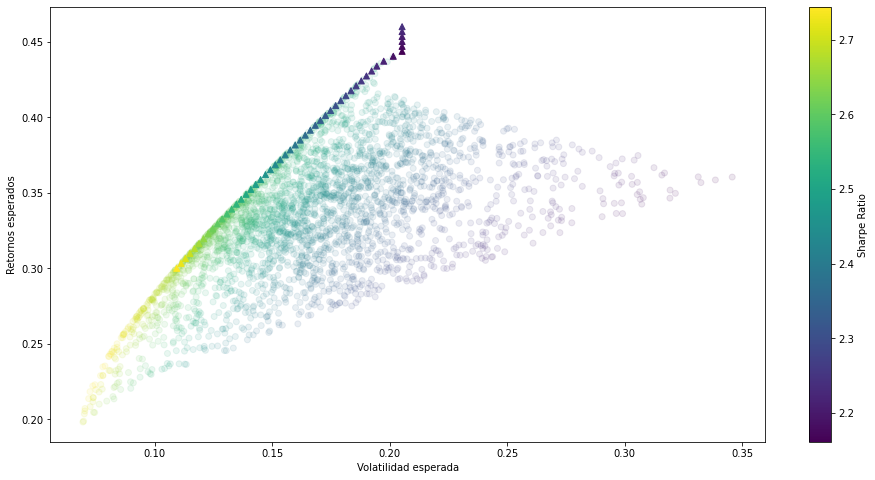

In [ ]:
plt.figure(figsize=(16,8))
plt.scatter(pvols, prets, c=prets / pvols, marker = 'o', alpha = 0.1)
plt.scatter(tvols, trets, c=trets / tvols , marker = '^', edgecolors='face')
plt.grid=True
plt.xlabel('Volatilidad esperada')
plt.ylabel('Retornos esperados')
plt.colorbar(cmap = 'inferno', label = 'Sharpe Ratio')
plt.show()

In [ ]:
#encontrar el peso ideal para tener el mejor sharpe ratio